In [2]:
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


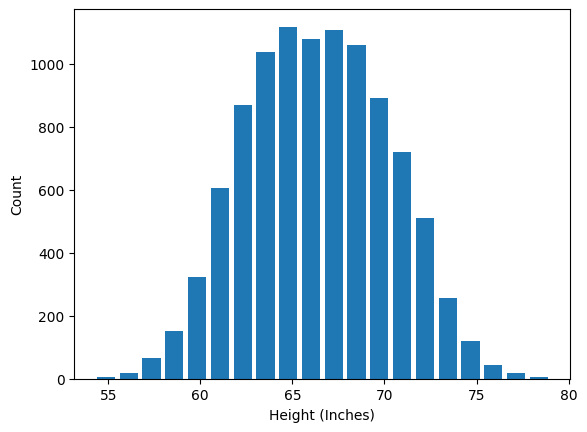

In [6]:
import matplotlib.pyplot as plt

plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")
plt.show()

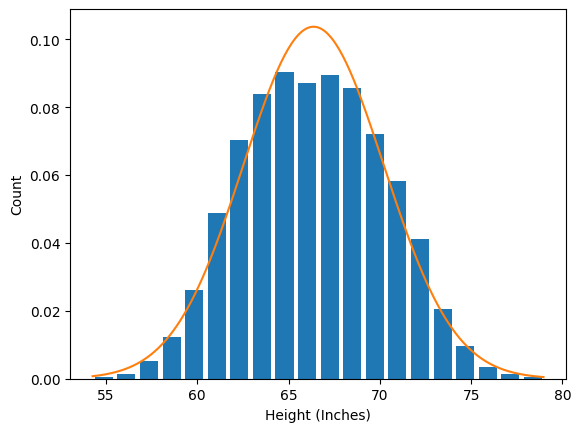

In [16]:
from scipy.stats import norm

plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")

range = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(range, norm.pdf(range, df.Height.mean(), df.Height.std()))

In [17]:
upper_limit = df.Height.mean() + 3*df.Height.std()
lower_limit = df.Height.mean() - 3*df.Height.std()

In [19]:
df[ (df.Height > upper_limit) | (df.Height < lower_limit) ]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [23]:
outlier_free = df[ (df.Height < upper_limit) & (df.Height > lower_limit) ]
outlier_free.shape

(9993, 3)

In [26]:
number_outlier = df.shape[0] - outlier_free.shape[0]
number_outlier

7

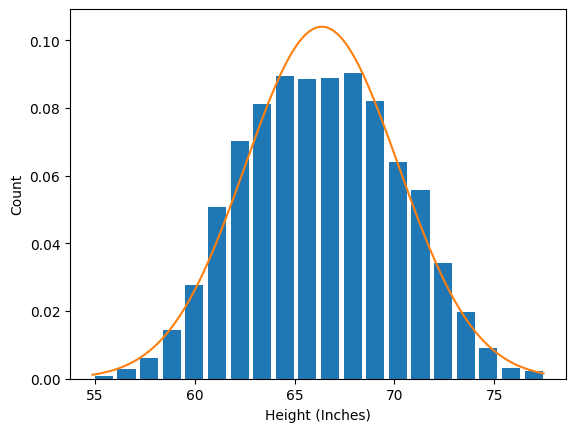

In [28]:
plt.hist(outlier_free.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")

range = np.arange(outlier_free.Height.min(), outlier_free.Height.max(), 0.1)
plt.plot(range, norm.pdf(range, outlier_free.Height.mean(), outlier_free.Height.std()))